In [1]:
import numpy as np
import EllipseFitter

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from snaptools import manipulate as man
from snaptools import utils
from snaptools import snapshot

%matplotlib inline


## Make Gaussian

In [2]:
N = 10000

x1 = -5
dx = 10

y1 = -10
dy = 5

xlen = 50
ylen = 50
NBINS = 200

x = np.random.normal(loc=x1, scale=dx, size=N)
y = np.random.normal(loc=y1, scale=dy, size=N)

print x.mean(), y.mean()

Z, binx, biny = np.histogram2d(x, y, range=[[-xlen, xlen],[-ylen, ylen]], bins=NBINS)
xbins, ybins = np.meshgrid(binx, biny, indexing='ij')

-5.043627941 -9.99362000291


/usr/users/spardy/miniconda3/envs/py2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


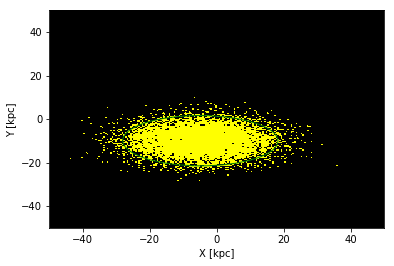

In [3]:
snap = snapshot.Snapshot()
snap.masses['stars'] = np.ones(N)
snap.pos['stars'] = np.zeros((N, 3))
snap.pos['stars'][:, 0] = x
snap.pos['stars'][:, 1] = y

snap.masses['halo'] = np.ones(N)
snap.pos['halo'] = np.zeros((N, 3))
snap.pos['halo'][:, 0] = x
snap.pos['halo'][:, 1] = y

snap.header['time'] = 0
settings = utils.make_settings(xlen=xlen, ylen=ylen, NBINS=NBINS, log_scale=False, in_min=1, in_max=3,
                               halo_center_method='com')
fig, axis = plt.subplots(1)
cent_dict, ell_arts, im = snap.find_centers(settings=settings, numcontours=1, plot=True, return_im=True, axis=axis)

In [4]:
print cent_dict

{'haloCenter': array([ 0.,  0.]), 'diskCenters': array([-4.897434  , -9.94549095]), 'barCenter': array([-4.897434  , -9.94549095]), 'time': 0}


In [5]:
iso_contour = Z > 1
angle, major, minor, xCenter, yCenter = EllipseFitter.EllipseFitter(iso_contour)


In [6]:
yCenter = man.grid_y_to_spatial(yCenter, ylen, NBINS)
xCenter = man.grid_x_to_spatial(xCenter, xlen, NBINS)
minor = man.grid_length_to_spatial(minor, xlen, NBINS)
major = man.grid_length_to_spatial(major, xlen, NBINS)
print angle, major, minor, xCenter, yCenter

0.461900409549 35.9228084274 18.3067041149 -5.02928363988 -9.90730880929


In [7]:
e = Ellipse([xCenter, yCenter], major, minor, angle=-angle, fill=False)


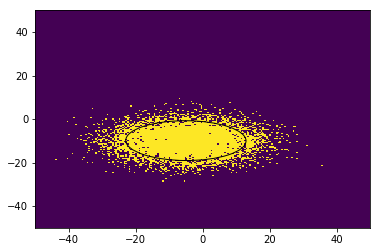

In [8]:
fig, axis = plt.subplots(1)
axis.pcolormesh(xbins, ybins, Z > 0)
axis.add_artist(e)

In [9]:
settings = {'in_max': 3, 'in_min': 1, 'ylen': ylen, 'xlen': xlen, 'NBINS': NBINS}
measurements = man.fit_contours(Z, settings, numcontours=1)

In [10]:
print measurements

{'majors': array([ 35.92280843]), 'eccs': array([ 0.86040417]), 'minors': array([ 18.30670411]), 'axes_ratios': array([ 0.50961227]), 'yCenters': array([-9.90730881]), 'angles': array([ 0.46190041]), 'xCenters': array([-5.02928364])}
